In [3]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 14.5 MB/s eta 0:00:00


In [4]:
import gymnasium as gym
import numpy as np

In [5]:
env = gym.make("FrozenLake-v1",render_mode="rgb_array",is_slippery=False)

In [6]:
env.observation_space

Discrete(16)

In [7]:
env.action_space

Discrete(4)

In [23]:
eps = 0.2
gamma = 0.9
alpha = 0.2
max_steps = 500



In [24]:
def choose_action(Q,state):
  if np.random.uniform(0,1) < eps:
    action = env.action_space.sample()
  else:
    action = np.argmax(Q[state,:])
  return action

In [25]:
def update(Q,state1,rew1,action1,state2,action2):
    pred = Q[state1,action1]
    target = rew1 + gamma * np.max(Q[state2,:])
    Q[state1,action1] += alpha * (target - pred)

In [26]:
Q = np.zeros((env.observation_space.n,env.action_space.n))
for episode in range(20000):
  state1,_ = env.reset()
  action1 = choose_action(Q,state1)

  for step in range(max_steps):
    state2,rew1,done,_,_ = env.step(action1)
    action2 = choose_action(Q,state2)
    update(Q,state1,rew1,action1,state2,action2)
    state1 = state2
    action1 = action2
    if(done):
      break


In [27]:
from google.colab.patches import cv2_imshow

In [28]:
def test(Q):
  eps = 0
  state1,_ = env.reset()
  action = choose_action(Q,state1)
  for step in range(max_steps):
    a = env.render()
    print("-----------------------------------------------------")
    cv2_imshow(a)
    state2,rew1,done,_,_ = env.step(action)
    action = choose_action(Q,state2)
    if(done):
      break


-----------------------------------------------------


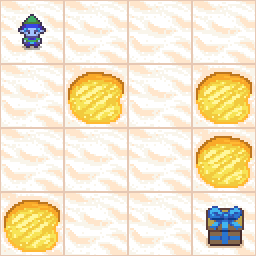

-----------------------------------------------------


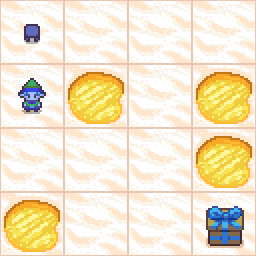

-----------------------------------------------------


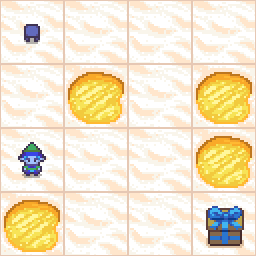

-----------------------------------------------------


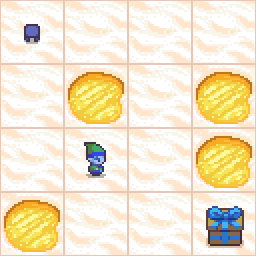

-----------------------------------------------------


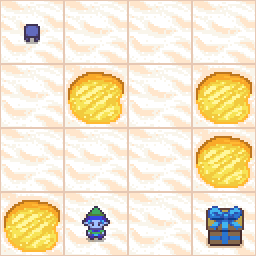

-----------------------------------------------------


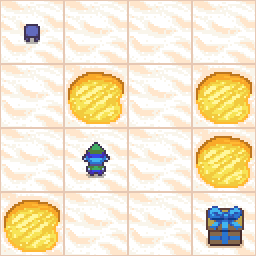

-----------------------------------------------------


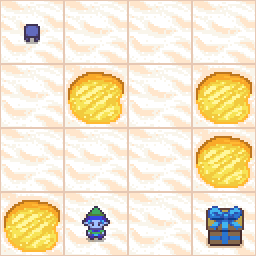

-----------------------------------------------------


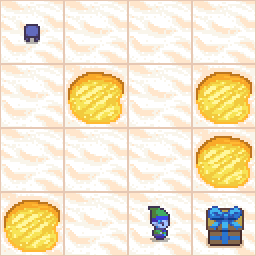

In [29]:
test(Q)

In [30]:
Q

array([[0.531441  , 0.59049   , 0.4782969 , 0.531441  ],
       [0.531441  , 0.        , 0.42756145, 0.47821739],
       [0.47810288, 0.26157935, 0.01538247, 0.15356092],
       [0.15395178, 0.        , 0.        , 0.        ],
       [0.59049   , 0.6561    , 0.        , 0.531441  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.81      , 0.        , 0.32312762],
       [0.        , 0.        , 0.        , 0.        ],
       [0.6561    , 0.        , 0.729     , 0.59049   ],
       [0.6561    , 0.81      , 0.81      , 0.        ],
       [0.729     , 0.9       , 0.        , 0.729     ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.81      , 0.9       , 0.729     ],
       [0.81      , 0.9       , 1.        , 0.81      ],
       [0.        , 0.        , 0.        , 0.        ]])